<b> Imports <b>

In [445]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn import naive_bayes
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
import statsmodels.api as sm
import scipy.stats as stats
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
import tensorflow as tf
from sklearn.svm import SVC, LinearSVC

<b>Import and initial exploration of the data</b>

In [446]:
#load student survey csv file into dataframe
df_s = pd.read_csv('ICT_STUDENTS_ORIG.csv')

In [447]:
#load teacher survey csv file into dataframe
df_t = pd.read_csv('ICT_TEACHERS_ORIG.csv')

In [448]:
#Check data type of each column for student data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_s.dtypes)

Unnamed: 0           int64
`                    int64
COUNTRY             object
COUNTRYID            int64
CNT                  int64
EU                   int64
SCHOOLID            object
CLASSID             object
STID                object
WAVE                 int64
N_Teachers_Part      int64
N_Students_Part      int64
N_Parents_Part       int64
ST25Q01              int64
ST22Q01            float64
ST01Q01            float64
ST01Q03            float64
ST01Q04            float64
ST02Q01            float64
ST03Q01            float64
ST03Q02            float64
ST03Q05            float64
ST03Q06            float64
ST03Q07            float64
ST03Q08            float64
ST03Q09            float64
ST03Q14            float64
ST03Q13            float64
ST03Q11            float64
ST03Q16            float64
ST27Q01            float64
ST27Q02            float64
ST27Q03            float64
ST27Q04            float64
ST05Q03            float64
ST05Q05            float64
ST05Q06            float64
S

In [449]:
#Check data type of each column for teacher data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_t.dtypes)

Unnamed: 0           int64
COUNTRY             object
COUNTRYID            int64
CNT                  int64
EU                   int64
LEVEL                int64
SCHOOLID            object
CLASSID             object
TEID                object
WAVE                 int64
N_Teachers_Part      int64
N_Students_Part      int64
N_Parents_Part       int64
TE02Q011             int64
TE02Q012             int64
TE02Q013             int64
TE02Q014             int64
TE02Q015             int64
TE02Q016             int64
TE04Q01            float64
TE04Q02            float64
TE04Q03            float64
TE05Q01            float64
TE05Q03            float64
TE05Q02            float64
TE05Q04            float64
TE05Q05            float64
TE06Q01            float64
TE07Q01            float64
TE30Q01            float64
TE09Q01            float64
TE09Q02            float64
TE09Q03            float64
TE09Q04            float64
TE09Q06            float64
TE09Q05            float64
TE09Q07            float64
T

In [450]:
#create a list of all columns to make data types consistent
df_s_columns = ['N_Teachers_Part', 'N_Students_Part', 'N_Parents_Part', 'ST25Q01', 'ST22Q01', 'ST01Q01', 'ST01Q03', 'ST01Q04', 'ST02Q01', 'ST03Q01', 'ST03Q02', 'ST03Q05', 'ST03Q06', 'ST03Q07', 'ST03Q08', 'ST03Q09', 'ST03Q14', 'ST03Q13', 'ST03Q11', 'ST03Q16', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST05Q03', 'ST05Q05', 'ST05Q06', 'ST05Q12', 'ST06Q12', 'ST05Q01', 'ST05Q16', 'ST05Q02', 'ST05Q18', 'ST05Q13', 'ST05Q22', 'ST05Q24', 'ST05Q25', 'ST05Q07', 'ST29Q01', 'ST29Q02', 'ST29Q06', 'ST29Q10', 'ST29Q03', 'ST29Q04', 'ST29Q05', 'ST29Q07', 'ST29Q08', 'ST29Q09', 'ST30Q01', 'ST30Q02', 'ST30Q03', 'ST30Q04', 'ST30Q05', 'ST30Q06', 'ST06Q02', 'ST06Q09', 'ST06Q04', 'ST06Q05', 'ST06Q18', 'ST06Q06', 'ST06Q07', 'ST06Q19', 'ST06Q20', 'ST06Q25', 'ST06Q01', 'ST06Q26', 'ST06Q27', 'ST06Q29', 'ST06Q15', 'ST08Q01', 'ST33Q01', 'ST33Q02', 'ST33Q03', 'ST33Q04', 'ST34Q01', 'ST34Q02', 'ST34Q03', 'ST34Q04', 'ST34Q05', 'ST34Q06', 'ST34Q07', 'ST34Q08', 'ST34Q09', 'ST34Q10', 'ST34Q11', 'ST34Q12', 'ST11Q09', 'ST11Q11', 'ST11Q10', 'ST12Q01', 'ST12Q02', 'ST12Q08', 'ST12Q09', 'ST12Q10', 'ST12Q03', 'ST12Q04', 'ST12Q05', 'ST12Q06', 'ST12Q07', 'ST13Q03', 'ST13Q04', 'ST13Q01', 'ST13Q02', 'ST13Q14', 'ST13Q19', 'ST13Q07', 'ST13Q20', 'ST13Q06', 'ST13Q10', 'ST13Q21', 'ST14Q01', 'ST14Q02', 'ST14Q03', 'ST14Q04', 'ST14Q13', 'ST14Q06', 'ST14Q08', 'ST14Q09', 'ST14Q11', 'ST15Q07', 'ST15Q17', 'ST15Q31', 'ST15Q06', 'ST15Q32', 'ST15Q33', 'ST15Q15', 'ST15Q23', 'ST15Q34', 'ST15Q13', 'ST15Q01', 'ST15Q08', 'ST15Q10', 'ST15Q02', 'ST15Q35', 'ST15Q37', 'ST15Q38', 'ST15Q18', 'ST15Q39', 'ST15Q14', 'ST15Q43', 'ST15Q27', 'ST16Q01', 'ST16Q02', 'ST16Q03', 'ST16Q04', 'ST16Q05', 'ST16Q06', 'ST16Q07', 'ST35Q01', 'ST35Q02', 'ST35Q03', 'ST35Q04', 'ST17Q01', 'ST17Q02', 'ST17Q03', 'ST17Q04', 'ST17Q05', 'ST17Q06', 'ST17Q07', 'ST17Q08', 'ST36Q01', 'ST36Q02', 'ST36Q03', 'ST18Q01', 'ST19Q01', 'ST19Q02', 'ST20Q01', 'ST39Q01', 'ST21Q01', 'ST21Q03', 'FSTWT', 'TSC_8934']
df_t_columns = ['N_Teachers_Part', 'N_Students_Part', 'N_Parents_Part', 'TE02Q011', 'TE02Q012', 'TE02Q013', 'TE02Q014', 'TE02Q015', 'TE02Q016', 'TE04Q01', 'TE04Q02', 'TE04Q03', 'TE05Q01', 'TE05Q03', 'TE05Q02', 'TE05Q04', 'TE05Q05', 'TE06Q01', 'TE07Q01', 'TE30Q01', 'TE09Q01', 'TE09Q02', 'TE09Q03', 'TE09Q04', 'TE09Q06', 'TE09Q05', 'TE09Q07', 'TE09Q08', 'TE09Q09', 'TE10Q01', 'TE10Q02', 'TE11Q01', 'TE11Q02', 'TE13Q01', 'TE14Q01', 'TE14Q02', 'TE14Q03', 'TE14Q04', 'TE14Q05', 'TE14Q06', 'TE14Q07', 'TE14Q08', 'TE14Q09', 'TE14Q12', 'TE14Q10', 'TE14Q11', 'TE15Q01', 'TE16Q01', 'TE16Q06', 'TE16Q02', 'TE16Q03', 'TE16Q04', 'TE16Q05', 'TE18Q01', 'TE18Q02', 'TE18Q08', 'TE18Q10', 'TE18Q12', 'TE18Q13', 'TE18Q14', 'TE18Q06', 'TE18Q03', 'TE18Q04', 'TE18Q05', 'TE19Q01', 'TE19Q02', 'TE19Q05', 'TE19Q03', 'TE19Q04', 'TE18Q07', 'TE31Q01', 'TE18Q09', 'TE32Q01', 'TE32Q02', 'TE21Q01', 'TE21Q02', 'TE21Q04', 'TE21Q05', 'TE21Q12', 'TE21Q06', 'TE21Q14', 'TE21Q11', 'TE21Q07', 'TE21Q08', 'TE21Q09', 'TE20Q01', 'TE20Q02', 'TE20Q22', 'TE20Q03', 'TE20Q04', 'TE20Q05', 'TE20Q06', 'TE20Q07', 'TE20Q08', 'TE20Q09', 'TE20Q10', 'TE20Q11', 'TE20Q12', 'TE20Q13', 'TE20Q14', 'TE20Q15', 'TE20Q16', 'TE20Q17', 'TE20Q18', 'TE20Q21', 'TE20Q19', 'TE20Q20', 'TE22Q08', 'TE22Q17', 'TE22Q07', 'TE22Q31', 'TE22Q15', 'TE22Q01', 'TE22Q03', 'TE22Q04', 'TE22Q05', 'TE22Q06', 'TE22Q09', 'TE22Q10', 'TE22Q11', 'TE22Q12', 'TE22Q14', 'TE22Q20', 'TE22Q23', 'TE22Q34', 'TE22Q35', 'TE22Q16', 'TE22Q30', 'TE33Q01', 'TE33Q02', 'TE22Q18', 'TE22Q19', 'TE33Q03', 'TE23Q01', 'TE23Q02', 'TE23Q03', 'TE23Q04', 'TE23Q05', 'TE23Q06', 'TE23Q07', 'TE24Q01', 'TE24Q02', 'TE24Q03', 'TE24Q04', 'TE24Q11', 'TE24Q05', 'TE24Q06', 'TE24Q07', 'TE24Q08', 'TE24Q09', 'TE25Q01', 'TE26Q01', 'TE27Q01', 'TE29Q01', 'TE28Q01', 'FSTWT', 'TSC_7477']

In [451]:
#make all columns numeric for student df
for i in df_s_columns:
    df_s[i] = pd.to_numeric(df_s[i], errors="coerce")

#make all columns numeric for teacher df
for i in df_t_columns:
    df_t[i] = pd.to_numeric(df_t[i], errors="coerce")

In [452]:
#display the shape of the student data frame 
df_s.shape

(48835, 182)

In [453]:
#display the shape of the teacher data frame
df_t.shape

(9927, 167)

In [454]:
#display portion of data that's null for student df and teacher df
print(((df_t.isnull().sum())/len(df_s)).mean())
print(((df_t.isnull().sum())/len(df_t)).mean())

0.012102098659239316
0.05953520580477006


<b>Fill null values with mean of each column</b>

In [455]:
#fill na values with column mean
df_s.fillna(df_s.mean(), inplace=True)
df_t.fillna(df_t.mean(), inplace=True)

In [456]:
#drop columns that I don't want to include in my predictor variables
df_s.drop(columns=['`', 'Unnamed: 0', 'CNT', 'EU', 'SCHOOLID','STID', 'WAVE','FSTWT', 'TSC_8934', 'COUNTRY'], inplace=True)

In [457]:
df_s['conf_agg']=df_s[['ST15Q07', 'ST15Q17', 'ST15Q31', 'ST15Q06', 'ST15Q32', 'ST15Q33', 'ST15Q15', 'ST15Q23', 'ST15Q34', 'ST15Q13', 'ST15Q01', 'ST15Q08', 'ST15Q10', 'ST15Q02', 'ST15Q35', 'ST15Q37', 'ST15Q38', 'ST15Q18', 'ST15Q39', 'ST15Q14', 'ST15Q43', 'ST15Q27']].mean(axis=1)

<b>Data Exploration: Student Data</b>

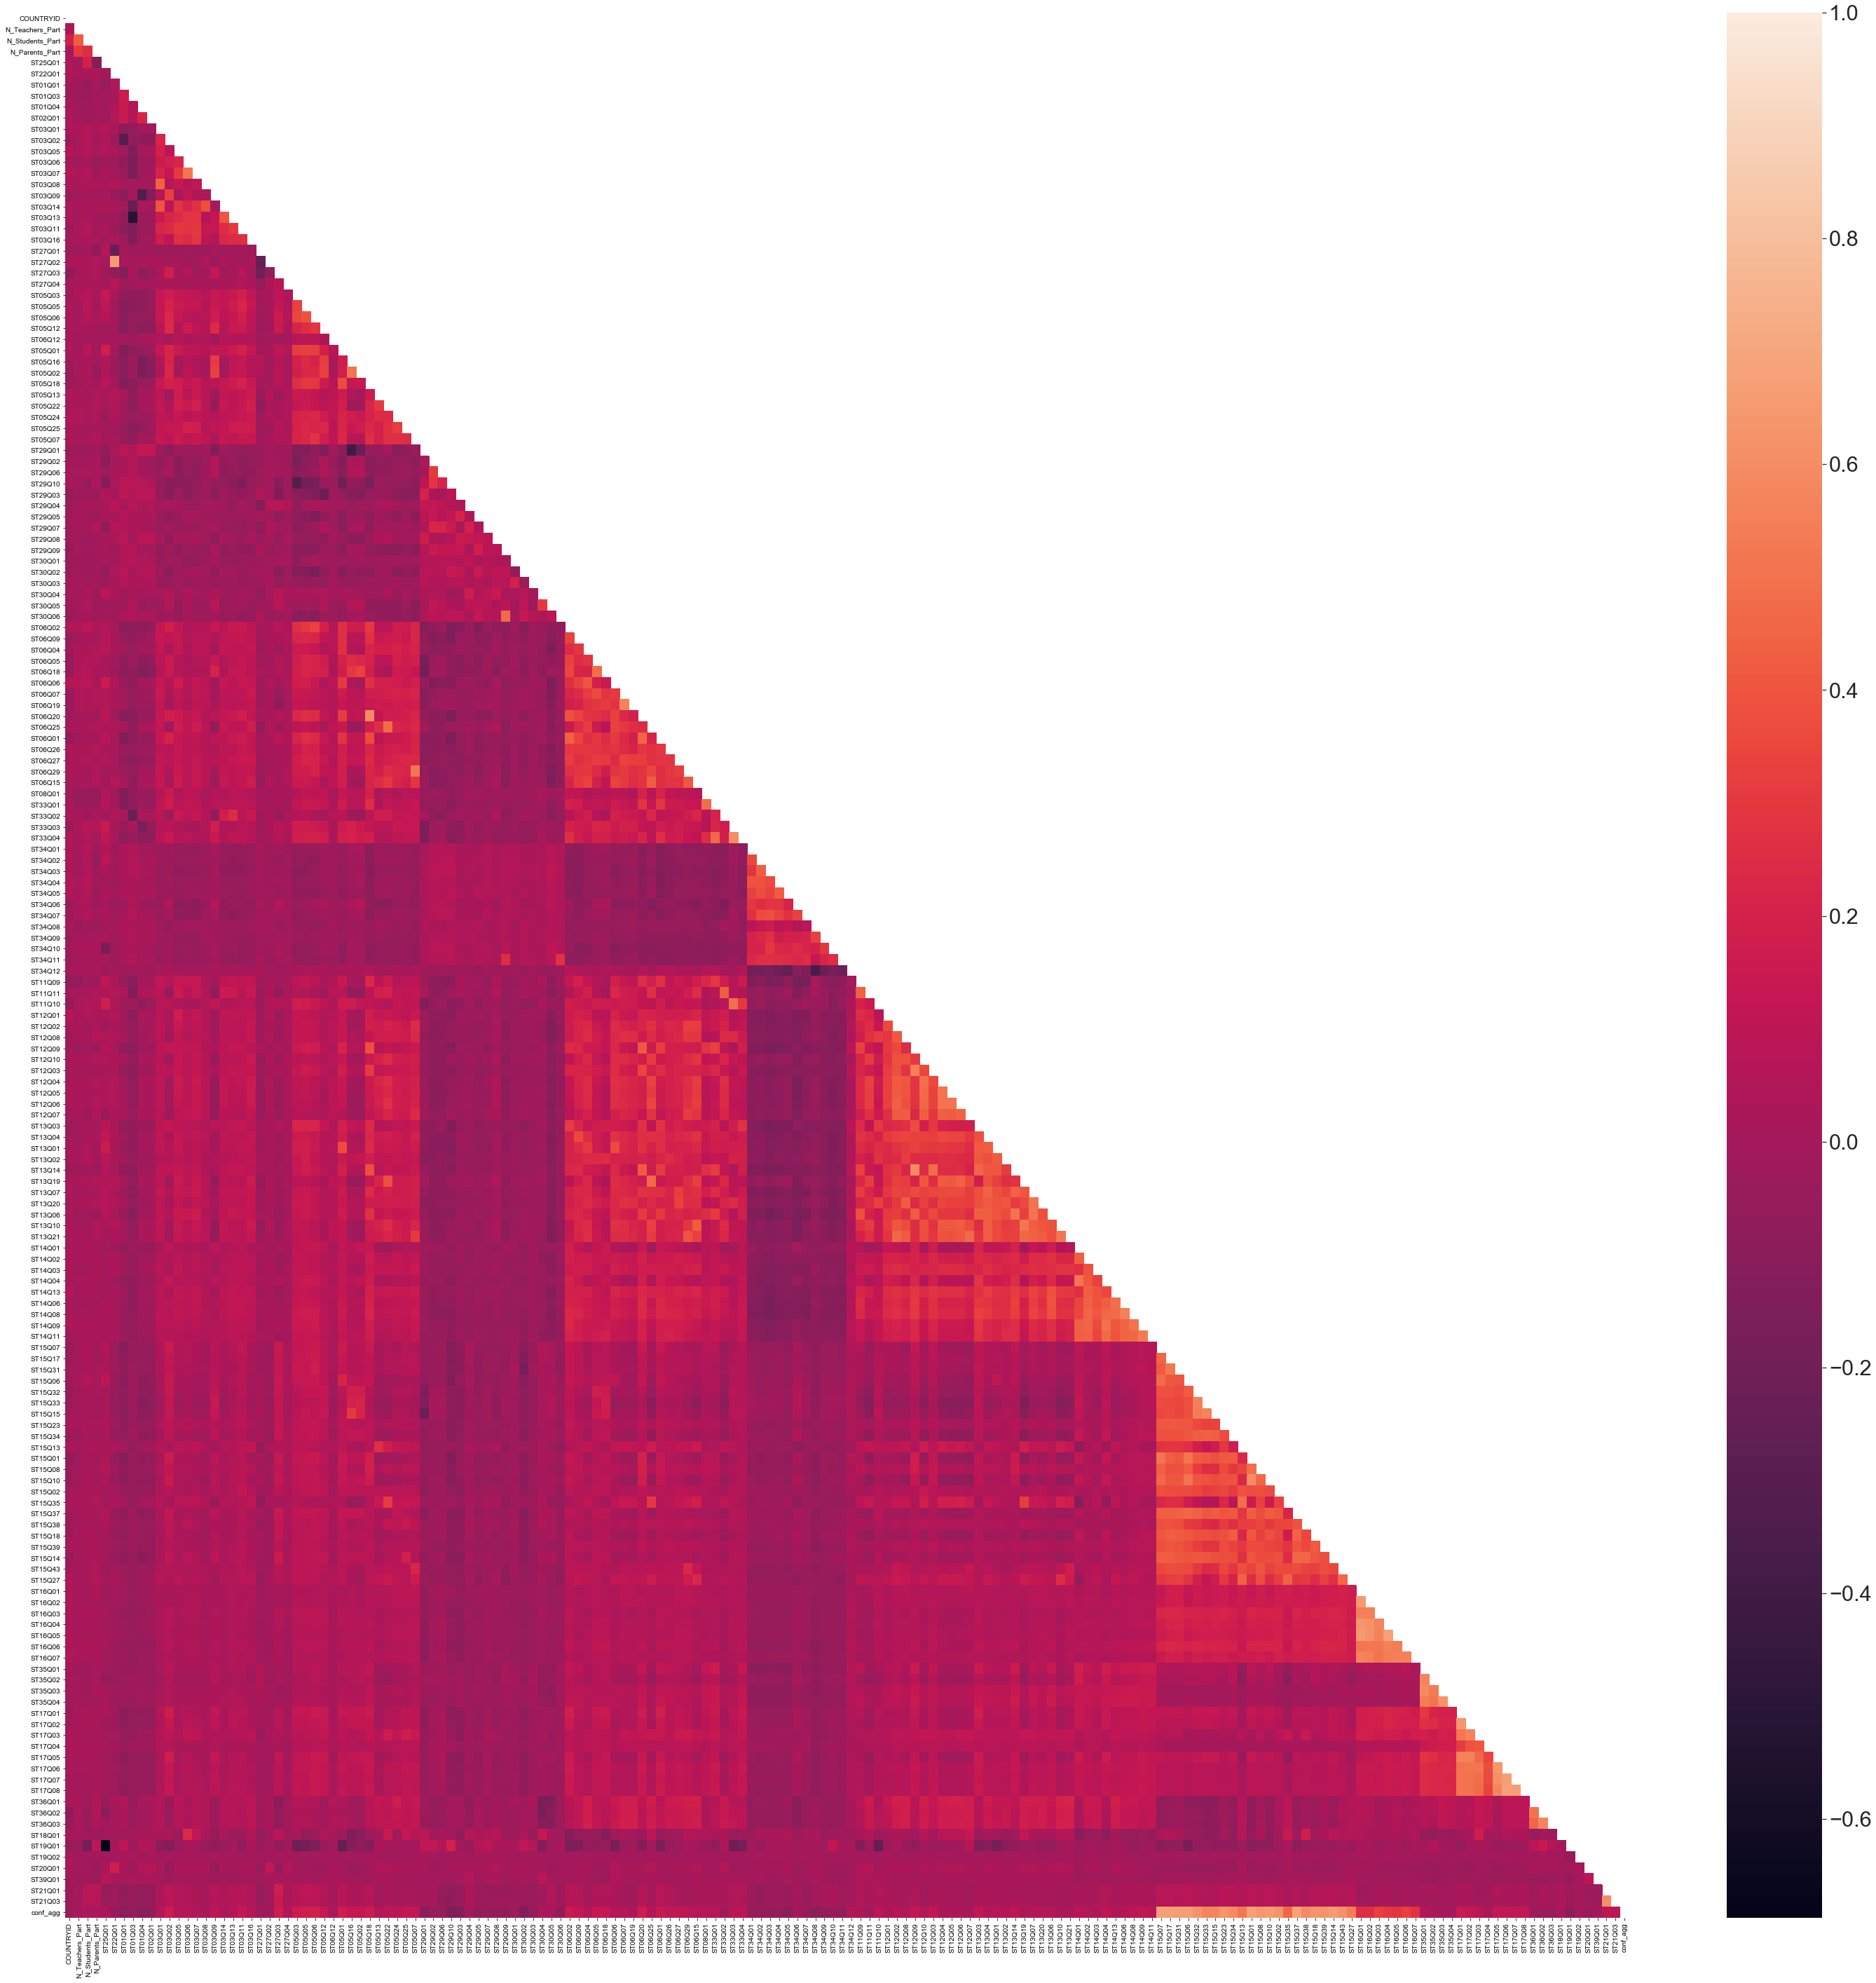

In [17]:
# construct a correlation matrix to check independence of variables, see which variables might be colinear and
# get a general sense of relationship between variables and target variable, 
fig, ax = plt.subplots(figsize=(50, 50))
corr = df_s.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=2.8)
sns.heatmap(df_s.corr(), annot=False, mask = mask)

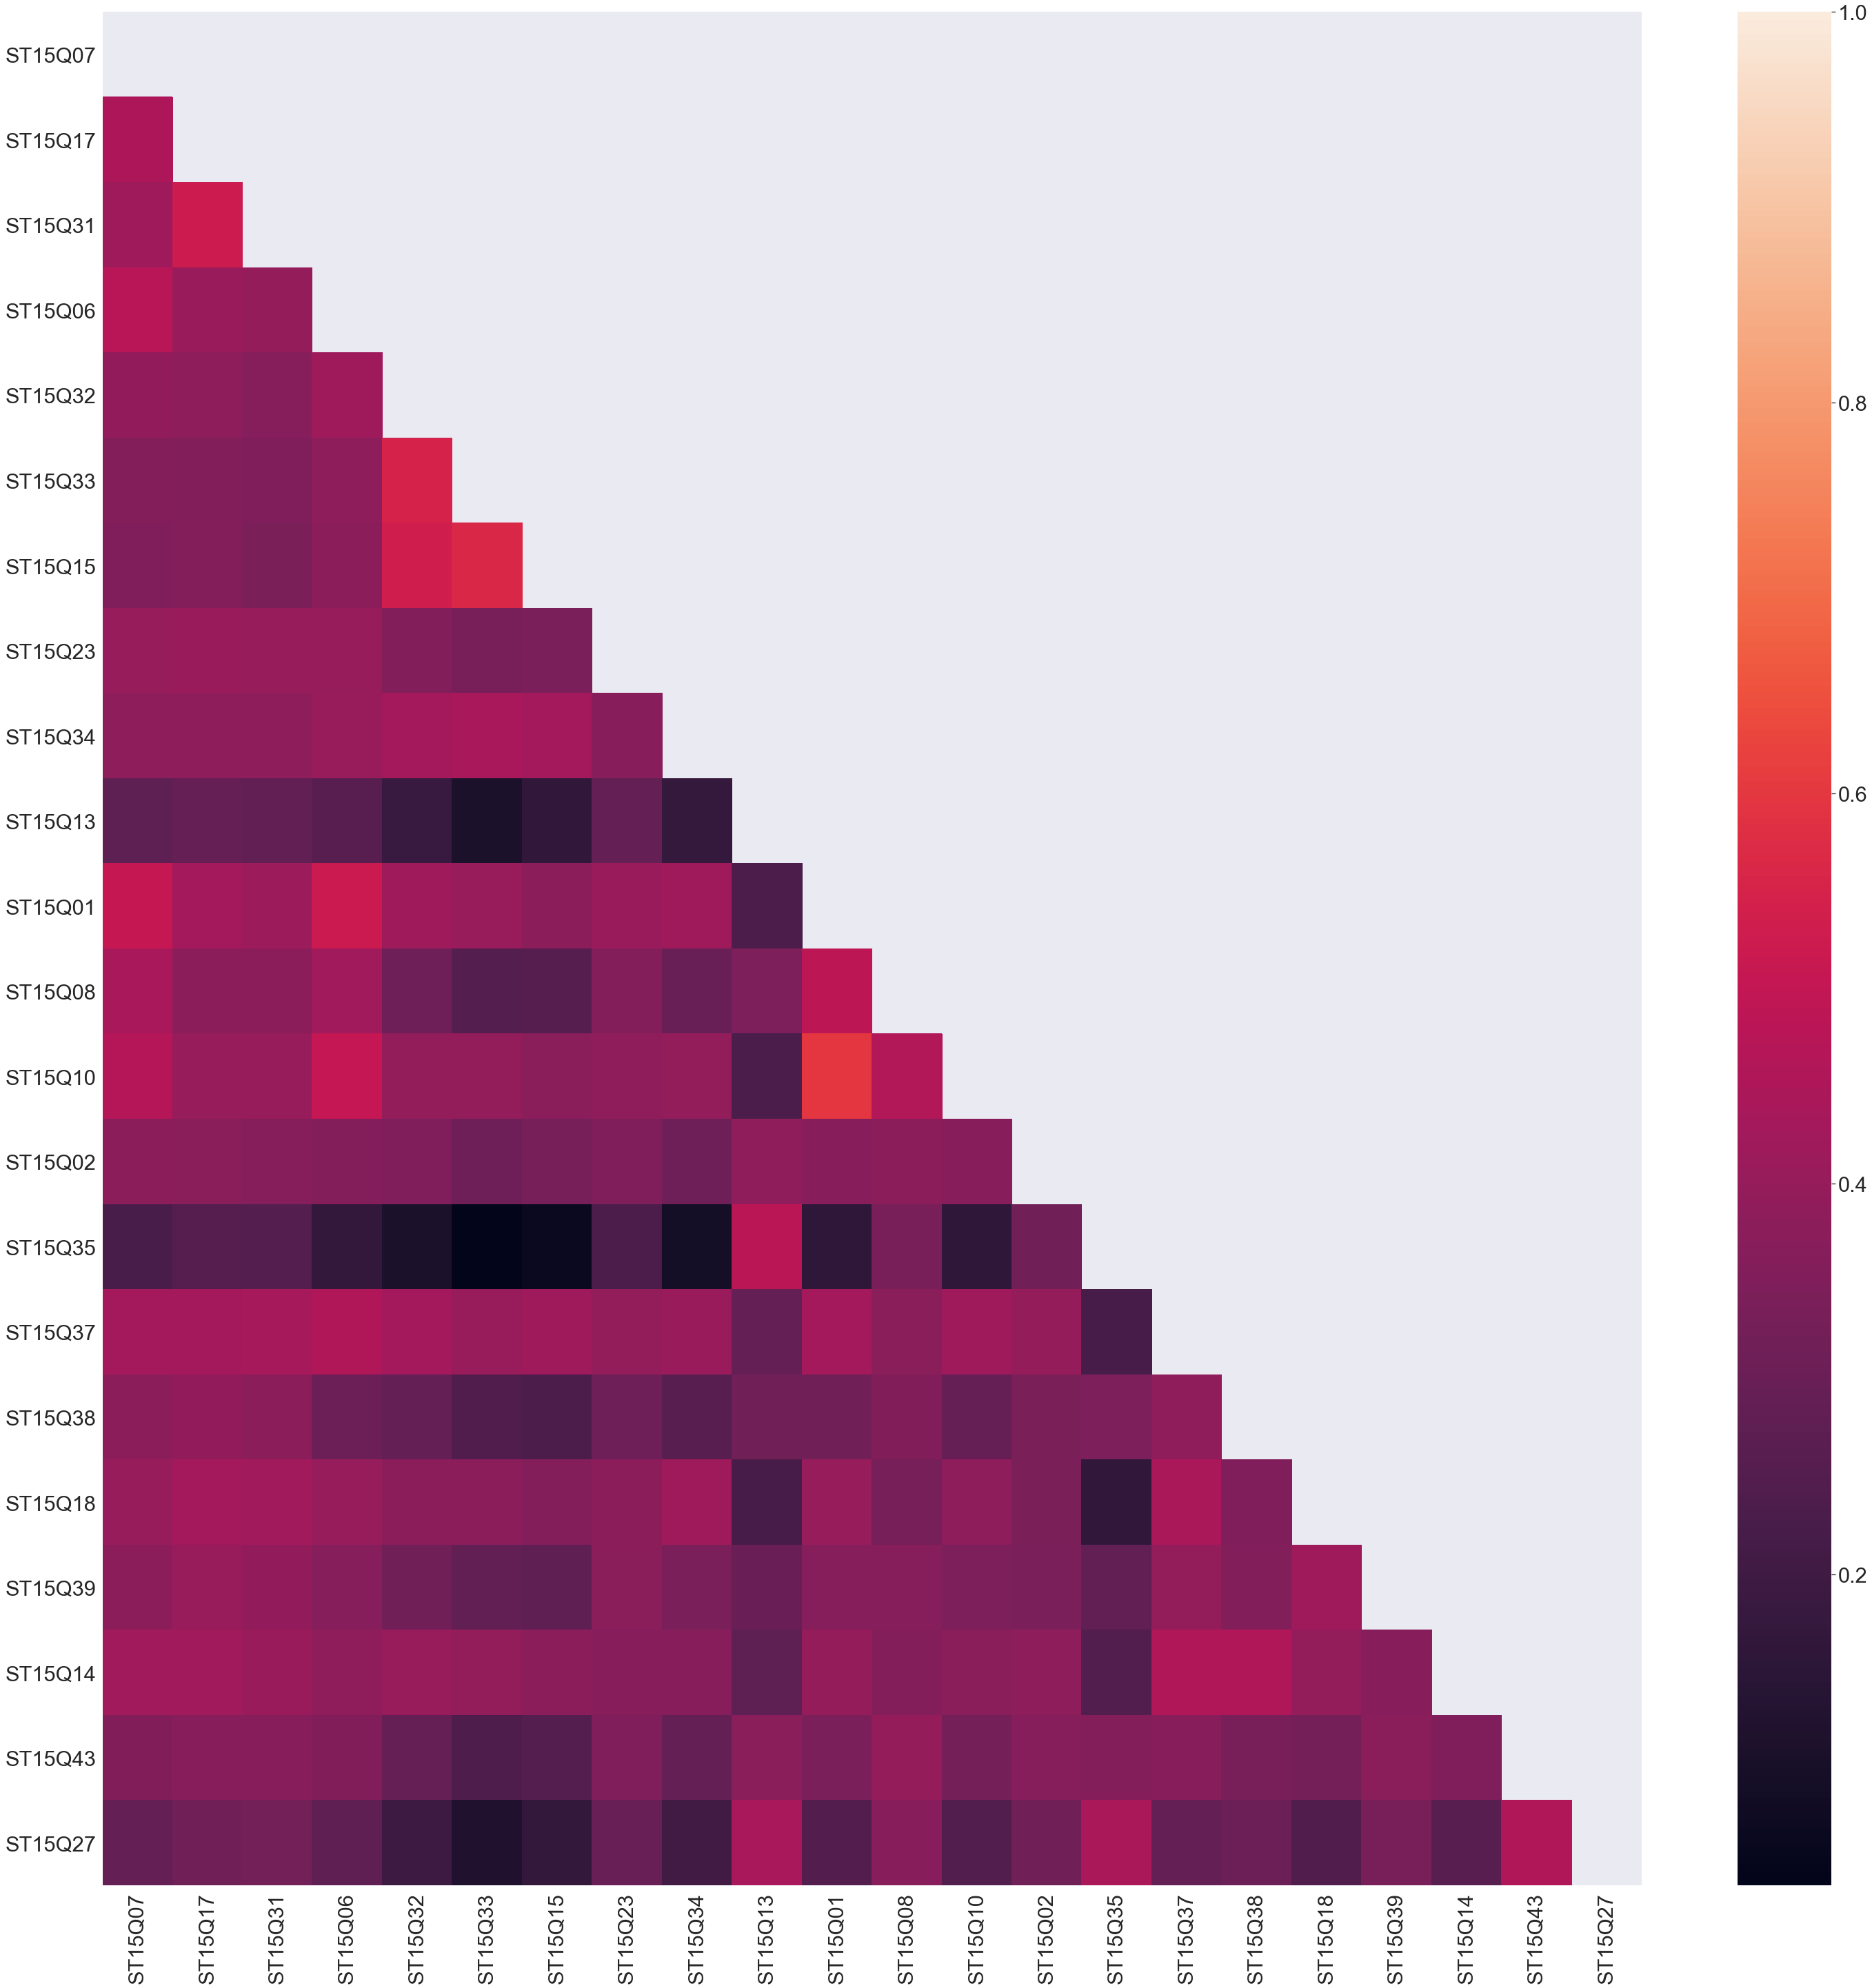

In [458]:
# construct a correlation matrix to examine relationship between individual variables in aggregated confidence
fig, ax = plt.subplots(figsize=(50, 50))
corr = df_s[['ST15Q07', 'ST15Q17', 'ST15Q31', 'ST15Q06', 'ST15Q32', 'ST15Q33', 'ST15Q15', 'ST15Q23', 'ST15Q34', 'ST15Q13', 'ST15Q01', 'ST15Q08', 'ST15Q10', 'ST15Q02', 'ST15Q35', 'ST15Q37', 'ST15Q38', 'ST15Q18', 'ST15Q39', 'ST15Q14', 'ST15Q43', 'ST15Q27']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(font_scale=2.8)
sns.heatmap(df_s[['ST15Q07', 'ST15Q17', 'ST15Q31', 'ST15Q06', 'ST15Q32', 'ST15Q33', 'ST15Q15', 'ST15Q23', 'ST15Q34', 'ST15Q13', 'ST15Q01', 'ST15Q08', 'ST15Q10', 'ST15Q02', 'ST15Q35', 'ST15Q37', 'ST15Q38', 'ST15Q18', 'ST15Q39', 'ST15Q14', 'ST15Q43', 'ST15Q27']].corr(), annot=False, mask = mask)

In [459]:
df_s.describe()

,COUNTRYID,N_Teachers_Part,N_Students_Part,N_Parents_Part,ST25Q01,ST22Q01,ST01Q01,ST01Q03,ST01Q04,ST02Q01,...,ST36Q02,ST36Q03,ST18Q01,ST19Q01,ST19Q02,ST20Q01,ST39Q01,ST21Q01,ST21Q03,conf_agg
count,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,...,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000,48835.000000
mean,14.584376,3.378458,25.565824,7.212430,2.569735,1.099130,1.108088,1.462977,1.044841,1.023775,...,1.835771,1.748899,1.474802,3.372029,6.501915,1.058500,1.893487,5.658100,5.524152,2.966400
std,8.875769,1.916678,13.683594,7.976891,0.707574,0.295268,0.307703,0.492525,0.205543,0.151424,...,0.950430,0.912035,0.480223,1.927886,3.431491,0.230635,1.826582,2.059912,1.979044,0.543174
min,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,2.000000,16.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,4.000000,2.681818
50%,13.000000,3.000000,22.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.835771,1.748899,1.474802,3.372029,7.000000,1.000000,1.000000,5.658100,5.524152,2.966400
75%,24.000000,4.000000,35.000000,10.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,5.000000,9.000000,1.000000,2.000000,7.000000,6.000000,3.318182
max,31.000000,10.000000,78.000000,86.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,4.000000,4.000000,2.000000,8.000000,12.000000,2.000000,9.000000,10.000000,10.000000,4.000000


In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_s.skew())

COUNTRYID          0.145827
N_Teachers_Part    0.482419
N_Students_Part    0.883340
N_Parents_Part     2.508325
ST25Q01            0.834554
ST22Q01            2.715407
ST01Q01            2.547441
ST01Q03            0.150346
ST01Q04            4.429016
ST02Q01            6.290195
ST03Q01            0.424632
ST03Q02           -1.413590
ST03Q05            1.799153
ST03Q06            0.494282
ST03Q07            1.363002
ST03Q08            0.155694
ST03Q09           -2.736807
ST03Q14            1.517844
ST03Q13            0.062777
ST03Q11            0.384862
ST03Q16            1.085408
ST27Q01           -1.849805
ST27Q02            3.918070
ST27Q03           -0.123275
ST27Q04            2.839205
ST05Q03           -0.227285
ST05Q05           -0.115019
ST05Q06           -0.503055
ST05Q12           -1.358653
ST06Q12            2.428918
ST05Q01            0.035523
ST05Q16           -2.025566
ST05Q02           -2.147150
ST05Q18            0.280068
ST05Q13            1.759962
ST05Q22            1

Some variables are moderately skewed. However, most models do not assume normality in the independent variables, and some researchers have raised concern about classic approaches for dealing with skewed data (e.g. through transformations). Therefore, I will move ahead with modelling without transforming these variables in the first instance.

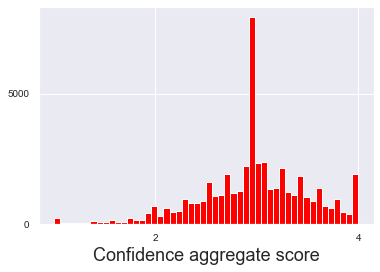

In [46]:
# Examine the distribution of the target variable
plt.hist(df_s['conf_agg'], color = 'red', edgecolor = 'white',
         bins = 50)
plt.xlabel('Aggregate confidence score', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<b> The taret variable is roughly normal, with high frequency of data points around the median. This may cause uneven proportions of and high confidence if I divide groups using the median. <b>

In [460]:
# Create low and high confidence groups based on median to balance the classes I want to predict
median_conf = df_s['conf_agg'].median()
df_s["conf_class"] = list(map((lambda x: 0 if x <= median_conf else 1), df_s["conf_agg"]))

In [461]:
#establish baseline accuracy 
df_s.conf_class.value_counts(normalize=True)

0    0.541087
1    0.458913
Name: conf_class, dtype: float64

In [462]:
#create a list of confidence columns
conf_columns = ['ST15Q07','ST15Q17','ST15Q31','ST15Q06','ST15Q32', 'ST15Q33','ST15Q15','ST15Q23','ST15Q34','ST15Q13','ST15Q01','ST15Q08','ST15Q10','ST15Q02','ST15Q35','ST15Q37','ST15Q38','ST15Q18','ST15Q39','ST15Q14','ST15Q43','ST15Q27']

In [466]:
df_s.drop(columns=conf_columns, inplace=True)

In [467]:
df_s.drop(columns='conf_agg', inplace=True)

In [ ]:
df_s.set_index('CLASSID', drop=True, inplace=True)

In [470]:
# dummify country ID variable
df_s_dum = pd.get_dummies(df_s, columns = ['COUNTRYID'], drop_first= True)